# Color Threshold, Blue screen

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

### Read in and display the image

In [2]:
image = cv2.imread("data/girl.jpg")
print("Type", type(image), " size:", image.shape)

Type <class 'numpy.ndarray'>  size: (991, 700, 3)


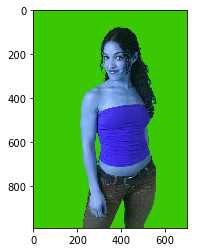

In [3]:
%matplotlib inline
plt.imshow(image)

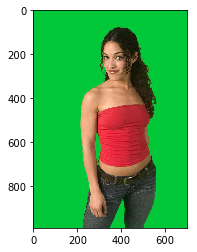

In [4]:
image_copy = np.copy(image)
image_copy = cv2.cvtColor(image_copy, cv2.COLOR_BGR2RGB)
plt.imshow(image_copy)

### Define the color threshold

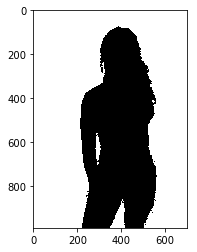

In [5]:
lower_blue = np.array([0, 120, 0])
upper_blue = np.array([50, 255, 65])

mask = cv2.inRange(image_copy, lower_blue, upper_blue)

plt.imshow(mask, cmap="gray")

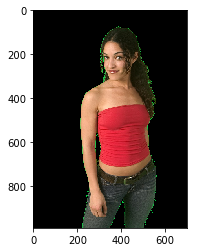

In [6]:
masked_image = np.copy(image_copy)
masked_image[mask != 0] = [0, 0, 0]

plt.imshow(masked_image)

### Mask and add a background image

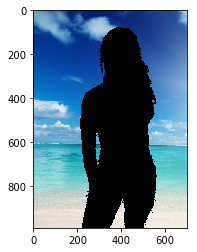

In [7]:
background_image = cv2.imread("data/beach.jpg")
background_image = cv2.cvtColor(background_image, cv2.COLOR_BGR2RGB)

crop_background = background_image[:991, :700]
crop_background[mask == 0] = [0, 0, 0]
plt.imshow(crop_background)

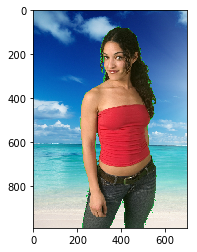

In [8]:
plt.imshow(masked_image + crop_background)

### Plot color channels

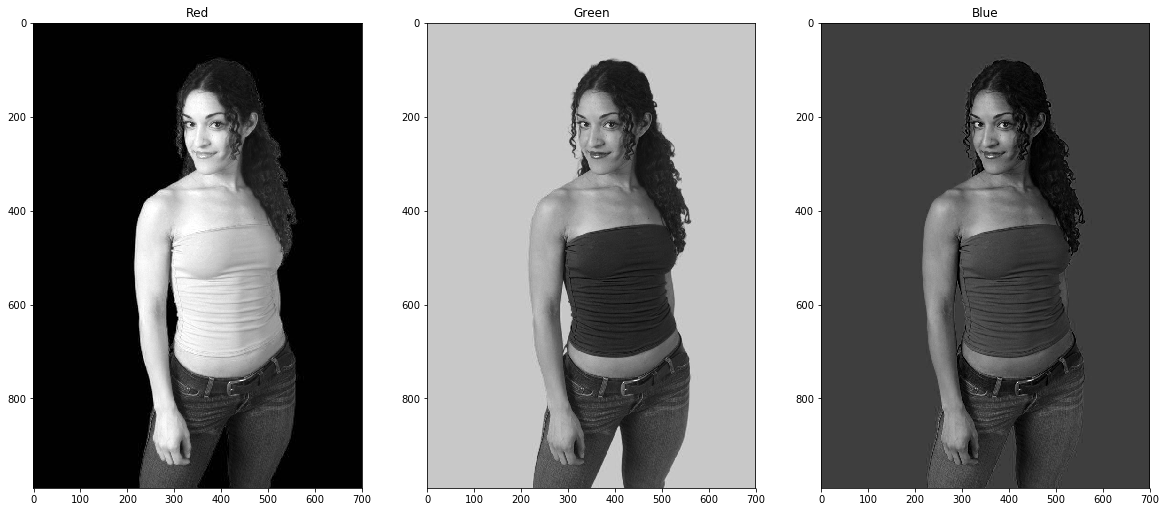

In [13]:
def plot_3_channels(image, names):
    f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,10))

    data = [(ax1, names[0]), (ax2, names[1]), (ax3, names[2])]

    for i, (ax, name) in enumerate(data):
        ax.set_title(name)
        ax.imshow(image[:, :, i], cmap="gray")
        
plot_3_channels(image_copy, ["Red", "Green", "Blue"])

### HSV

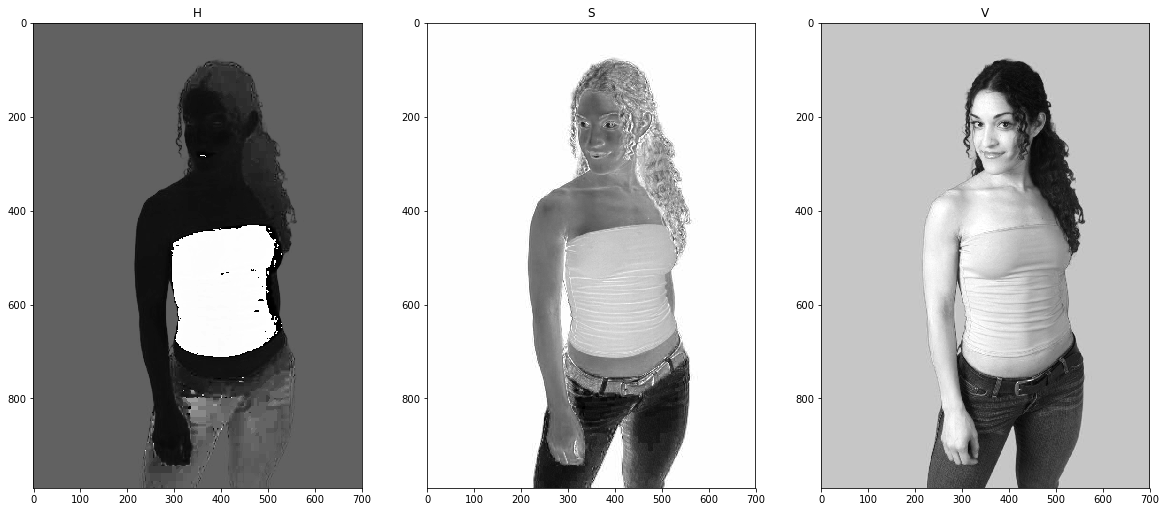

In [14]:
hsv = cv2.cvtColor(image_copy, cv2.COLOR_RGB2HSV)

plot_3_channels(hsv, list("HSV"))

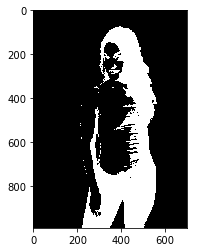

In [23]:
lower_skin = np.array([0, 0, 0])
upper_skin = np.array([180, 255, 180])

mask = cv2.inRange(hsv, lower_skin, upper_skin)

plt.imshow(mask, cmap="gray")